In [1]:
import pandas as pd
import numpy as np
import decimal
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 
              'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 
              'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 
              'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 
              'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [3]:
train_data = pd.read_csv('kc_house_train_data.csv', dtype = dtype_dict)
train_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [4]:
test_data = pd.read_csv('kc_house_test_data.csv', dtype = dtype_dict)
test_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0114101516,20140528T000000,310000.0,3.0,1.0,1430.0,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780.0,12697.0
1,9297300055,20150124T000000,650000.0,4.0,3.0,2950.0,5000,2,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140.0,4000.0
2,1202000200,20141103T000000,233000.0,3.0,2.0,1710.0,4697,1.5,0,0,...,6,1710,0,1941,0,98002,47.3048,-122.218,1030.0,4705.0
3,8562750320,20141110T000000,580500.0,3.0,2.5,2320.0,3980,2,0,0,...,8,2320,0,2003,0,98027,47.5391,-122.070,2580.0,3980.0
4,7589200193,20141110T000000,535000.0,3.0,1.0,1090.0,3000,1.5,0,0,...,8,1090,0,1929,0,98117,47.6889,-122.375,1570.0,5080.0


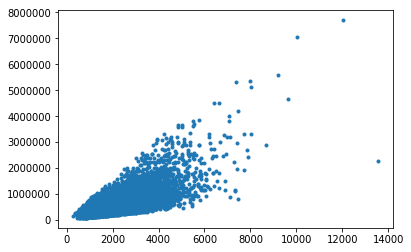

In [5]:
plt.plot(train_data['sqft_living'], train_data['price'], '.')

In [6]:
def simple_lin_reg(input_feature, output):
    sum_xy = np.sum(np.multiply(input_feature, output))
    sum_x = np.sum(input_feature)
    sum_x2 = np.sum(np.multiply(input_feature, input_feature))
    
    slope = (sum_xy - sum_x*np.mean(output))/(sum_x2 - sum_x*np.mean(input_feature))
    intercept = np.mean(output) - slope*np.mean(input_feature)
    
    return (slope, intercept)       

In [7]:
slope, intercept = simple_lin_reg(train_data['sqft_living'], train_data['price'])
print('slope: {}, intercept: {}'.format(slope,intercept))

slope: 281.9588396303426, intercept: -47116.07907289418


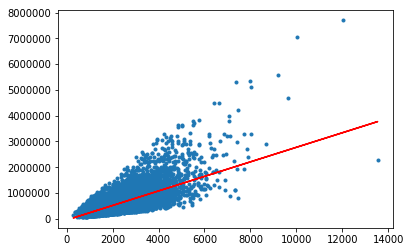

In [8]:
x = train_data['sqft_living'].unique()
y = slope*x + intercept
plt.plot(train_data['sqft_living'], train_data['price'], '.',
        x, y, 'r')

### Question 1
predict price of a 2650 sqft house

In [9]:
predicted_price = 2650*slope + intercept
print('The predicted price of a 2560sqft house is {:0.2f}'.format(predicted_price))

The predicted price of a 2560sqft house is 700074.85


<hr>

In [10]:
def get_RSS(input_feature, output, slope, intercept):
    return np.sum((output - (input_feature*slope + intercept))**2)

<hr>

### Question 2

Calculate the RSS

In [11]:
rss = get_RSS(train_data['sqft_living'], train_data['price'], slope, intercept)
print('The RSS using the slope and intercept is {:0.2E}'.format(decimal.Decimal(rss)))

The RSS using the slope and intercept is 1.20E+15


### Question 3

Predict the size of a $800k house

In [12]:
predicted_area = (800000 - intercept) / slope
print('The predicted size of a $800,000 house is {}'.format(predicted_area))

The predicted size of a $800,000 house is 3004.3962451522766


<hr>

In [13]:
bedroom_slope, bedroom_intercept = simple_lin_reg(train_data['bedrooms'], train_data['price'])

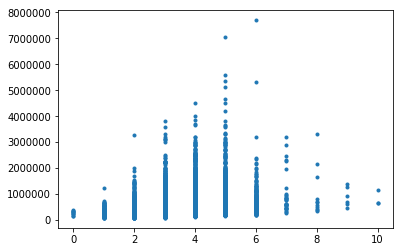

In [14]:
plt.plot(train_data['bedrooms'], train_data['price'], '.')

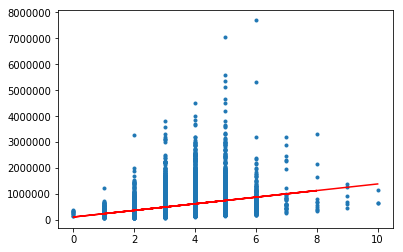

In [15]:
x = train_data['bedrooms'].unique()
y = bedroom_slope*x + bedroom_intercept
plt.plot(train_data['bedrooms'], train_data['price'], '.',
        x, y, 'r')

In [45]:
rss_bedroom = get_RSS(test_data['bedrooms'], test_data['price'], bedroom_slope, bedroom_intercept)
rss_sqft = get_RSS(test_data['sqft_living'], test_data['price'], slope, intercept)
if rss_bedroom < rss_sqft:
    print("bedroom")
else:
    print("sqft")

sqft
